**BUILDING NEURAL NETWORK MODEL FOR THE IMDB DATASET**







In [61]:
#Importing required packages

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Visualization Packages

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Deep Learning Packages

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.python import metrics
from tensorflow.keras.utils import plot_model

In [62]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
     

In [63]:
max([max(sequence) for sequence in train_data])

9999

The ability to decode integers to reviews is demonstrated in the section below. 

In [64]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

# DATA PREPARATION
The dataset is vectorized here by Create an all-zero matrix of shape (len(sequences), dimension).

In [65]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

DATA VECTORIZATION

In [66]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**MODEL-1**

In [67]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
     

In [68]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [69]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.1704 - accuracy: 0.7673 - val_loss: 0.1217 - val_accuracy: 0.8435
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0872 - accuracy: 0.8941 - val_loss: 0.0906 - val_accuracy: 0.8780
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0656 - accuracy: 0.9171 - val_loss: 0.0831 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0504 - accuracy: 0.9369 - val_loss: 0.0938 - val_accuracy: 0.8722
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0422 - accuracy: 0.9471 - val_loss: 0.0904 - val_accuracy: 0.8785
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0333 - accuracy: 0.9607 - val_loss: 0.0976 - val_accuracy: 0.8747
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0308 - accuracy: 0.9624 - val_loss: 0.0988 - val_accuracy: 0.8733
Epoch 8/20
30

In [70]:
history_dict_1 = history.history
history_dict_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

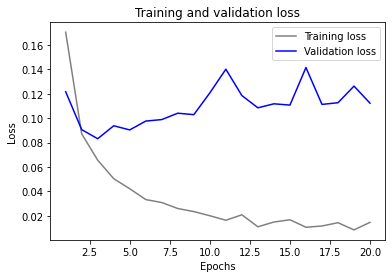

In [71]:

import matplotlib.pyplot as plt
history_dict_1 = history.history
loss_values = history_dict_1["loss"]
val_loss_values = history_dict_1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "blue", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

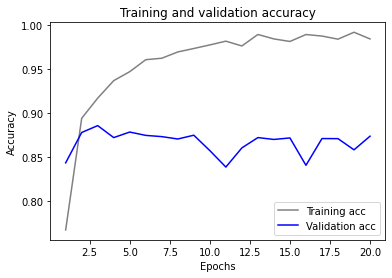

In [72]:

plt.clf()
acc = history_dict_1["accuracy"]
val_acc = history_dict_1["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "blue", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
     

In [73]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1489 - accuracy: 0.8142
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.0783 - accuracy: 0.9003
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.0597 - accuracy: 0.9231
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0895 - accuracy: 0.8816


In [74]:
results

[0.08945966511964798, 0.881600022315979]

In [75]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.06397393],
       [0.9921777 ],
       [0.7766795 ],
       ...,
       [0.06553878],
       [0.04680231],
       [0.21327224]], dtype=float32)

**MODEL-2**

In [76]:

model_1 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history_1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.1665 - accuracy: 0.7913 - val_loss: 0.1176 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0938 - accuracy: 0.8969 - val_loss: 0.0979 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0703 - accuracy: 0.9165 - val_loss: 0.0855 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0541 - accuracy: 0.9366 - val_loss: 0.1076 - val_accuracy: 0.8517
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0453 - accuracy: 0.9468 - val_loss: 0.0842 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0371 - accuracy: 0.9583 - val_loss: 0.0862 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0320 - accuracy: 0.9645 - val_loss: 0.0877 - val_accuracy: 0.8802
Epoch 8/20
30

In [77]:
history_dict_2 = history_1.history
history_dict_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

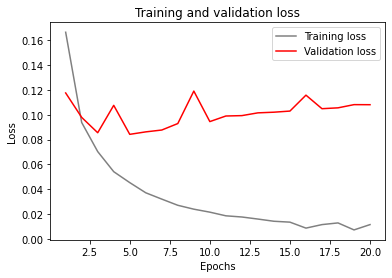

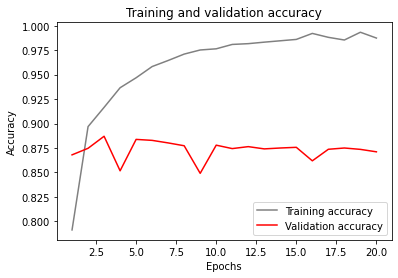

In [78]:
import matplotlib.pyplot as plt
history_dict_2 = history_1.history
loss_values = history_dict_2["loss"]
val_loss_values = history_dict_2["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict_2["accuracy"]
val_acc = history_dict_2["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training accuracy")
plt.plot(epochs, val_acc, "red", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
np.random.seed(111)
model_1 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model_1.fit(x_train, y_train, epochs=5, batch_size=512)
results_1 = model_1.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 16ms/step - loss: 0.1471 - accuracy: 0.8118
Epoch 2/5
49/49 [==============================] - 1s 20ms/step - loss: 0.0806 - accuracy: 0.9000
Epoch 3/5
49/49 [==============================] - 1s 27ms/step - loss: 0.0617 - accuracy: 0.9223
Epoch 4/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0522 - accuracy: 0.9346
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.0899 - accuracy: 0.8800


In [80]:
results_1

[0.08990815281867981, 0.8799600005149841]

In [81]:
model_1.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.06687741],
       [0.9991978 ],
       [0.79281014],
       ...,
       [0.09085386],
       [0.05202426],
       [0.62543714]], dtype=float32)

**MODEL-3**

In [82]:
np.random.seed(222)
model_2 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1649 - accuracy: 0.7784 - val_loss: 0.1244 - val_accuracy: 0.8314
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0862 - accuracy: 0.8903 - val_loss: 0.0880 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0634 - accuracy: 0.9173 - val_loss: 0.0839 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0476 - accuracy: 0.9402 - val_loss: 0.0898 - val_accuracy: 0.8782
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0381 - accuracy: 0.9544 - val_loss: 0.0904 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0356 - accuracy: 0.9567 - val_loss: 0.0930 - val_accuracy: 0.8806
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0284 - accuracy: 0.9671 - val_loss: 0.0956 - val_accuracy: 0.8788
Epoch 8/20
30

In [83]:
history_dict_3 = history_2.history
history_dict_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

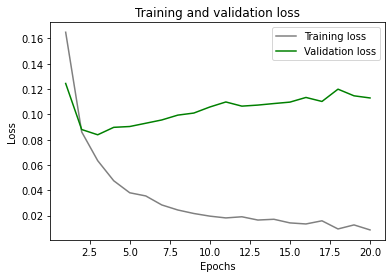

In [84]:
loss_values = history_dict_3["loss"]
val_loss_values = history_dict_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "green", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

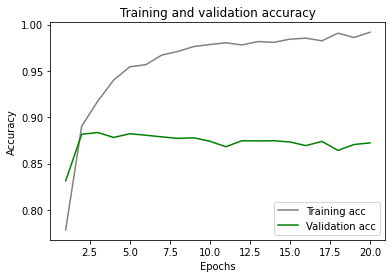

In [85]:
plt.clf()
acc = history_dict_3["accuracy"]
val_acc = history_dict_3["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "green", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [86]:
np.random.seed(333)
model_3 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=3, batch_size=512)
results_3 = model_3.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 15ms/step - loss: 0.1444 - accuracy: 0.8129
Epoch 2/3
49/49 [==============================] - 1s 16ms/step - loss: 0.0750 - accuracy: 0.9024
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1004 - accuracy: 0.8661


In [87]:
results_3

[0.10044776648283005, 0.8660799860954285]

In [88]:
model_3.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.20131122],
       [0.99118525],
       [0.98341435],
       ...,
       [0.16633241],
       [0.09122287],
       [0.49122518]], dtype=float32)

**MODEL-4**

In [89]:
np.random.seed(444)
model_32 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
#compiling the model
model_32.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Model fit
np.random.seed(444)
history_32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.1675 - accuracy: 0.7697 - val_loss: 0.1201 - val_accuracy: 0.8451
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0913 - accuracy: 0.8861 - val_loss: 0.1038 - val_accuracy: 0.8551
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0682 - accuracy: 0.9120 - val_loss: 0.0952 - val_accuracy: 0.8689
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0565 - accuracy: 0.9297 - val_loss: 0.1438 - val_accuracy: 0.8083
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0455 - accuracy: 0.9454 - val_loss: 0.0925 - val_accuracy: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0422 - accuracy: 0.9496 - val_loss: 0.0879 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0328 - accuracy: 0.9621 - val_loss: 0.1104 - val_accuracy: 0.8578
Epoch 8/20
30

In [90]:
history_dict_32 = history_32.history
history_dict_32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

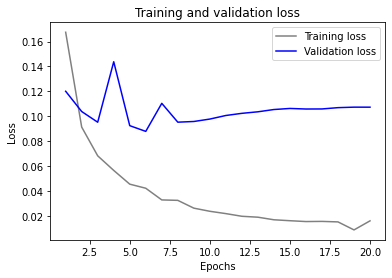

In [91]:
loss_values = history_dict_32["loss"]
val_loss_values = history_dict_32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "blue", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

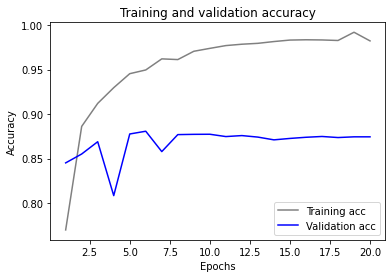

In [92]:

plt.clf()
acc = history_dict_32["accuracy"]
val_acc = history_dict_32["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "blue", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [93]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=512)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
49/49 [==============================] - 1s 20ms/step - loss: 0.0516 - accuracy: 0.9404
Epoch 2/3
49/49 [==============================] - 1s 23ms/step - loss: 0.0433 - accuracy: 0.9506
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1125 - accuracy: 0.8670


[0.11248872429132462, 0.8669999837875366]

In [94]:
model_32.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.00212105],
       [0.9999856 ],
       [0.956947  ],
       ...,
       [0.01290561],
       [0.0102308 ],
       [0.7700529 ]], dtype=float32)

**MODEL-5**

In [95]:
np.random.seed(555)
model_64 = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history_64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1634 - accuracy: 0.7693 - val_loss: 0.1135 - val_accuracy: 0.8493
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0861 - accuracy: 0.8911 - val_loss: 0.0845 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0692 - accuracy: 0.9091 - val_loss: 0.0995 - val_accuracy: 0.8651
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0552 - accuracy: 0.9307 - val_loss: 0.1064 - val_accuracy: 0.8578
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0513 - accuracy: 0.9332 - val_loss: 0.0882 - val_accuracy: 0.8806
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0404 - accuracy: 0.9494 - val_loss: 0.0939 - val_accuracy: 0.8739
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0405 - accuracy: 0.9485 - val_loss: 0.0916 - val_accuracy: 0.8807
Epoch 8/20
30

In [96]:
history_dict_64 = history_64.history
history_dict_64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

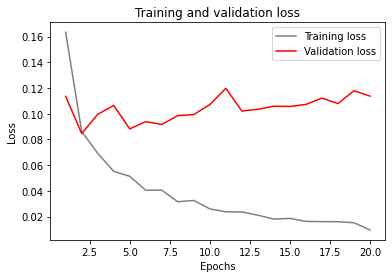

In [97]:
loss_values = history_dict_64["loss"]
val_loss_values = history_dict_64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

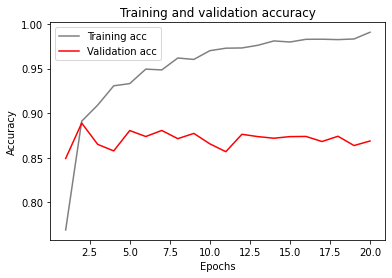

In [98]:
plt.clf()
acc = history_dict_64["accuracy"]
val_acc = history_dict_64["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "red", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [99]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=512)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
49/49 [==============================] - 1s 28ms/step - loss: 0.0559 - accuracy: 0.9350
Epoch 2/3
49/49 [==============================] - 1s 27ms/step - loss: 0.0446 - accuracy: 0.9488
Epoch 3/3
782/782 [==============================] - 2s 3ms/step - loss: 0.1156 - accuracy: 0.8632


[0.11556952446699142, 0.8632400035858154]

In [100]:
model_64.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.00204152],
       [0.9999997 ],
       [0.9666541 ],
       ...,
       [0.11421378],
       [0.00843984],
       [0.9436339 ]], dtype=float32)

In [101]:
np.random.seed(666)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(666)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.1936 - accuracy: 0.7217 - val_loss: 0.1299 - val_accuracy: 0.8617
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1205 - accuracy: 0.8601 - val_loss: 0.0967 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0909 - accuracy: 0.8973 - val_loss: 0.0857 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0737 - accuracy: 0.9140 - val_loss: 0.0829 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0615 - accuracy: 0.9286 - val_loss: 0.0854 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0541 - accuracy: 0.9374 - val_loss: 0.0912 - val_accuracy: 0.8770
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0463 - accuracy: 0.9454 - val_loss: 0.0902 - val_accuracy: 0.8795
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

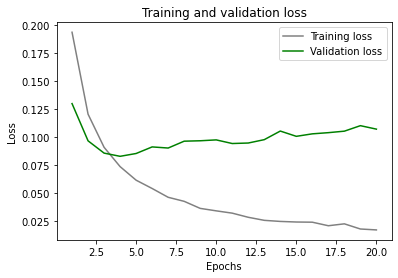

In [102]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "green", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

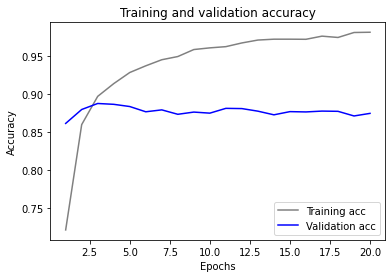

In [103]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "blue", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [104]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0539 - accuracy: 0.9370
Epoch 2/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0474 - accuracy: 0.9456
Epoch 3/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0438 - accuracy: 0.9490
Epoch 4/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0392 - accuracy: 0.9551
Epoch 5/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0379 - accuracy: 0.9559
Epoch 6/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0356 - accuracy: 0.9594
Epoch 7/8
49/49 [==============================] - 1s 19ms/step - loss: 0.0340 - accuracy: 0.9613
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1146 - accuracy: 0.8684


[0.11460333317518234, 0.8683599829673767]

In [105]:
np.random.seed(111)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="tanh",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="tanh",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="tanh",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.2049 - accuracy: 0.7011 - val_loss: 0.1301 - val_accuracy: 0.8416
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1245 - accuracy: 0.8555 - val_loss: 0.1195 - val_accuracy: 0.8518
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0955 - accuracy: 0.8963 - val_loss: 0.1063 - val_accuracy: 0.8751
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0859 - accuracy: 0.9074 - val_loss: 0.1108 - val_accuracy: 0.8735
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0731 - accuracy: 0.9275 - val_loss: 0.1086 - val_accuracy: 0.8783
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0696 - accuracy: 0.9303 - val_loss: 0.1045 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0632 - accuracy: 0.9397 - val_loss: 0.1064 - val_accuracy: 0.8825
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

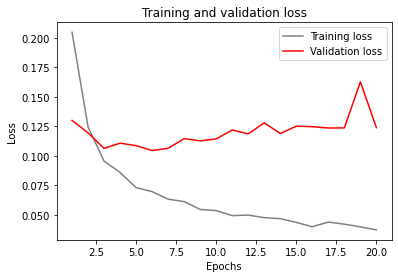

In [106]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "grey", label="Training loss")
plt.plot(epochs, val_loss_values, "red", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

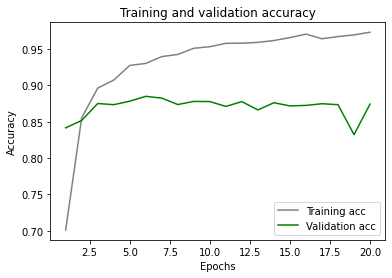

In [107]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "grey", label="Training acc")
plt.plot(epochs, val_acc, "green", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 24ms/step - loss: 0.0727 - accuracy: 0.9304
Epoch 2/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0663 - accuracy: 0.9370
Epoch 3/8
49/49 [==============================] - 1s 21ms/step - loss: 0.0621 - accuracy: 0.9415
Epoch 4/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0583 - accuracy: 0.9478
Epoch 5/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0564 - accuracy: 0.9483
Epoch 6/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0542 - accuracy: 0.9522
Epoch 7/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0529 - accuracy: 0.9534
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1242 - accuracy: 0.8688


[0.12419350445270538, 0.8688399791717529]

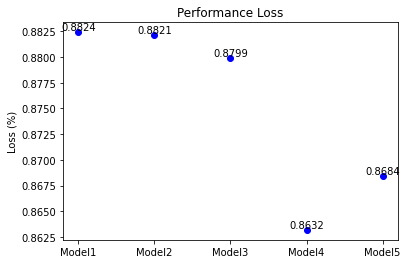

In [109]:


Models = ('Model1','Model2','Model3','Model4','Model5')
Loss = (0.8824,0.8821,0.8799,0.8632,0.8684)

plt.scatter(Models,Loss,color='blue')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(Models,Loss):
    plt.text(xi, yi, yi, va='bottom', ha='center')


plt.show()